In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X shape: (50, 2)


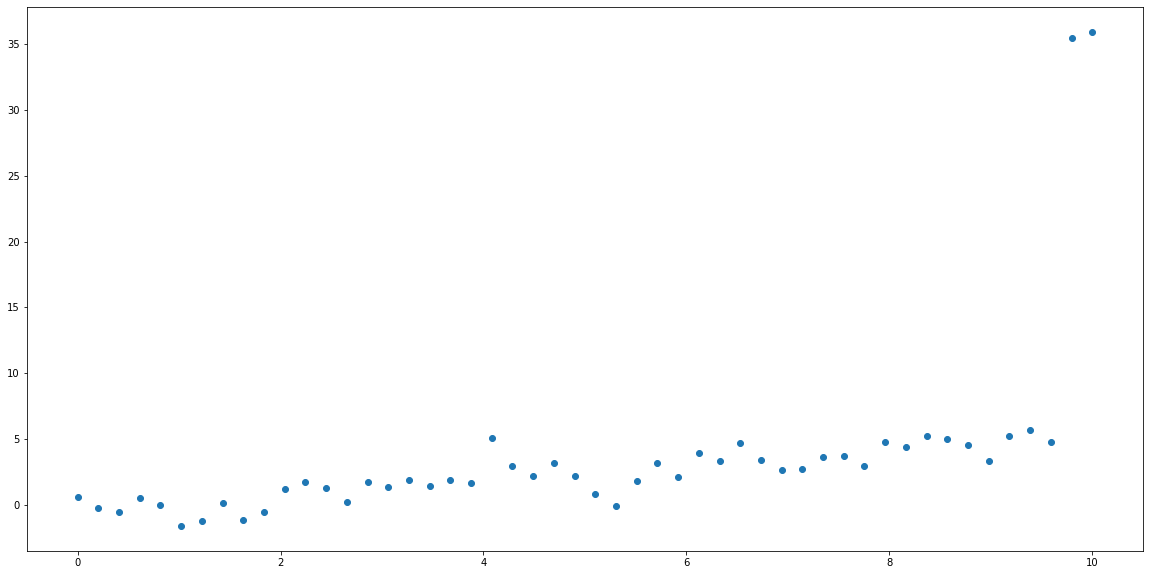

In [ ]:
N = 50

X = np.vstack((np.ones(N), np.linspace(0, 10, N))).T
print(f'X shape: {X.shape}')
Y = 0.5 * X[:,1] + np.random.randn(N)
Y[-1] +=30
Y[-2] +=30

fig = plt.figure(figsize=(20,10))
plt.scatter(X[:,1], Y);

In [ ]:
def r2(Y, Y_hat):
  res_Y_mean = Y - Y.mean()
  res_Y_hat = Y - Y_hat
  R2 = 1 - res_Y_hat.dot(res_Y_hat) / res_Y_mean.dot(res_Y_mean)
  return R2


def regress(X, Y, l2_lambda = 0):
  D = X.shape[1]
  w = np.linalg.solve(l2_lambda * np.eye(D) + X.T.dot(X), X.T.dot(Y))
  Y_hat = X.dot(w)
  
  R2 = r2(Y, Y_hat)
  
  return Y_hat, R2, w

R2 for Maximum Likelihood: 0.3034409966645617
R2 for MAP (L2 reguralization with lamda=1000): 0.18537132896407182


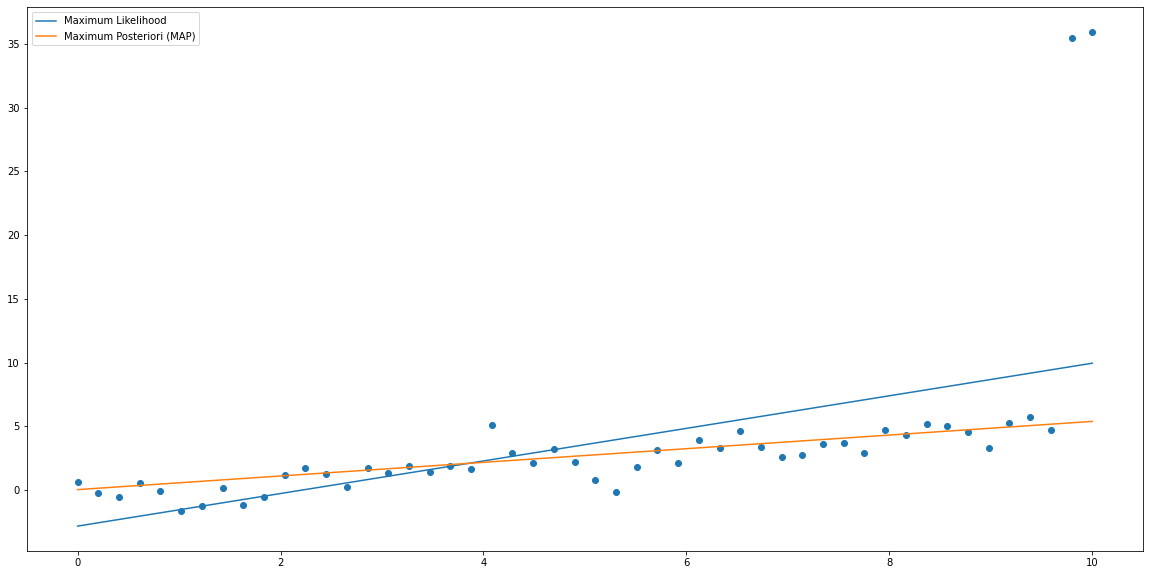

In [ ]:
Y_hat, R2, _ = regress(X, Y)
l2_lambda = 1000
Y_hat_l2, R2_l2, _ = regress(X, Y, l2_lambda)

fig = plt.figure(figsize=(20,10))
plt.scatter(X[:,1], Y);
plt.plot(X[:,1], Y_hat, label='Maximum Likelihood');
plt.plot(X[:,1], Y_hat_l2, label='Maximum Posteriori (MAP)');
plt.legend();

print(f'R2 for Maximum Likelihood: {R2}')
print(f'R2 for MAP (L2 reguralization with lamda={l2_lambda}): {R2_l2}')